<a href="https://colab.research.google.com/github/Mey1921/wildfire-activities-in-Australia/blob/main/wildfire_activities_in_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install dash dash-html-components dash-core-components plotly

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime as dt
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update

In [ ]:
import requests
import io
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"

try:
    resp = requests.get(URL)
    resp.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)
    text = io.BytesIO(resp.content)
    df = pd.read_csv(text)
    print('Data read into a pandas dataframe!')
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Data read into a pandas dataframe!


In [ ]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [ ]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [ ]:
df.dtypes

,0
Region,object
Date,object
Estimated_fire_area,float64
Mean_estimated_fire_brightness,float64
Mean_estimated_fire_radiative_power,float64
Mean_confidence,float64
Std_confidence,float64
Var_confidence,float64
Count,int64
Replaced,object


In [ ]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [ ]:
df.dtypes

,0
Region,object
Date,object
Estimated_fire_area,float64
Mean_estimated_fire_brightness,float64
Mean_estimated_fire_radiative_power,float64
Mean_confidence,float64
Std_confidence,float64
Var_confidence,float64
Count,int64
Replaced,object


In [ ]:
df_efa = df.groupby('Year')['Estimated_fire_area'].mean()

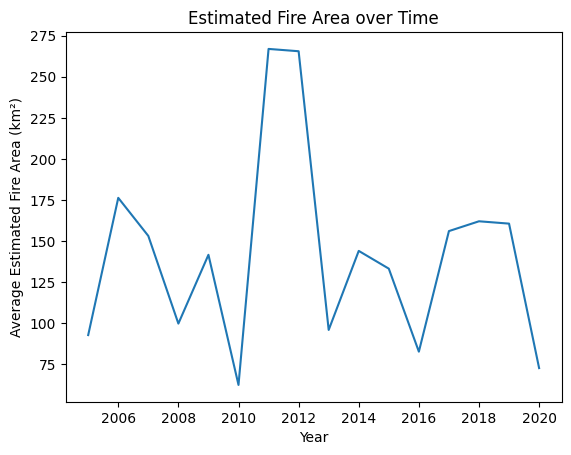

In [ ]:
df_efa.plot(x=df_efa.index, y=df_efa.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

In [ ]:
df2 = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()

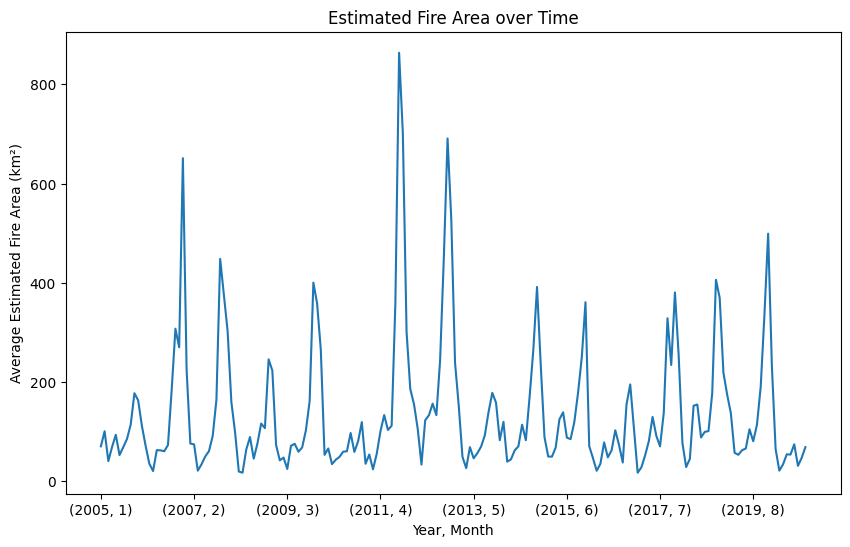

In [ ]:
plt.figure(figsize=(10, 6))
df2.plot(x=df2.index, y=df2.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

In [ ]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

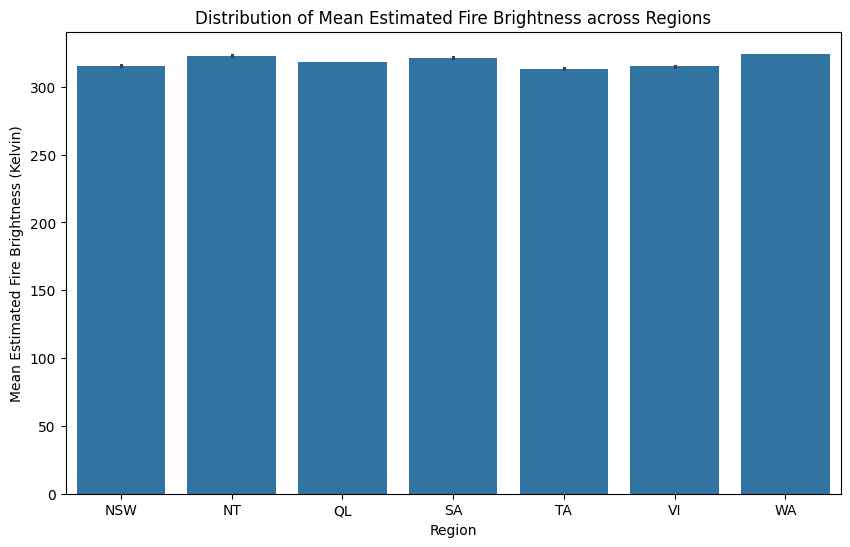

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

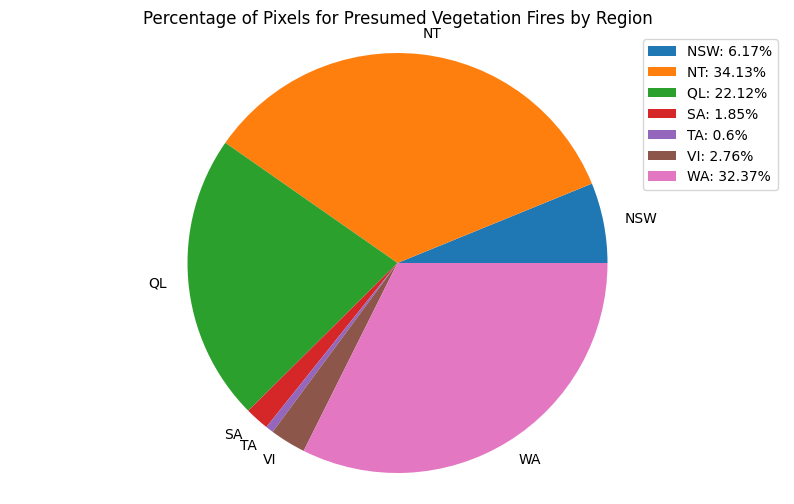

In [ ]:
plt.figure(figsize=(10, 6))
region_counts = df.groupby('Region')['Count'].sum()
plt.pie(region_counts, labels=region_counts.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([f"{i}: {round(k/region_counts.sum()*100, 2)}%"
            for i, k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()

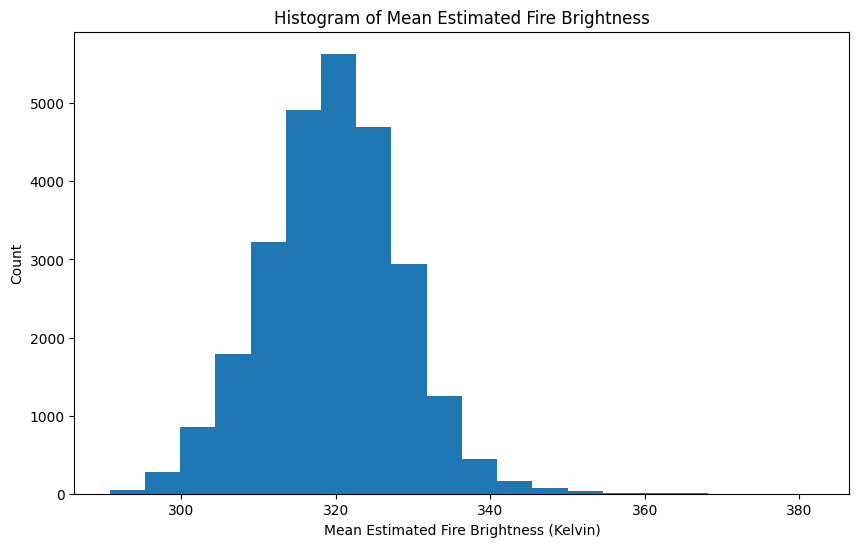

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

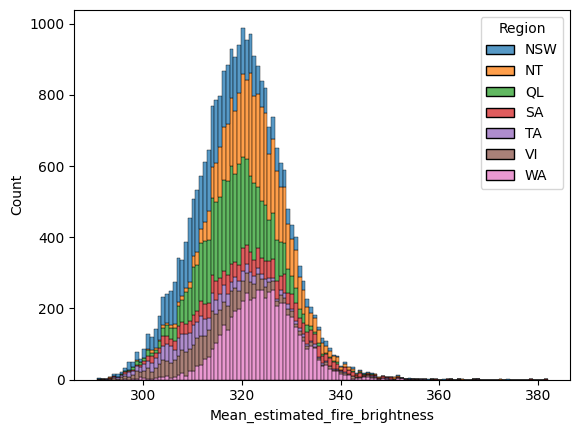

In [ ]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

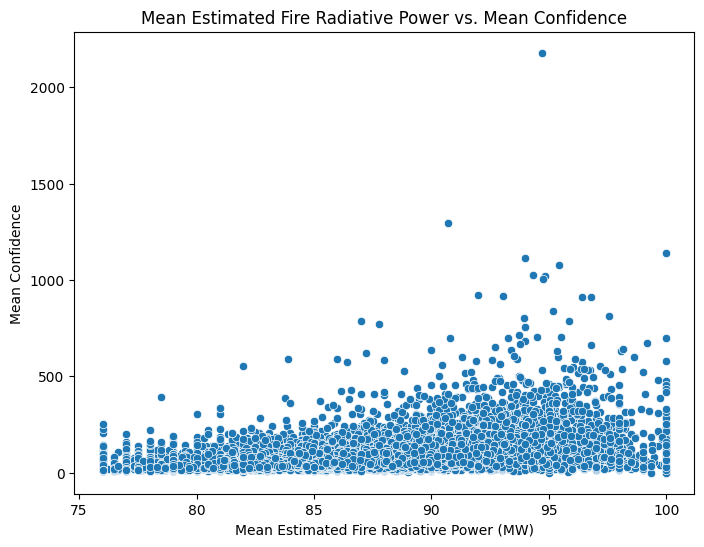

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

In [ ]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411],
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [ ]:
aus_reg = folium.map.FeatureGroup()

Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5,
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

Aus_map.add_child(aus_reg)

# ***Dashboard***

In [ ]:
app = dash.Dash(__name__)
app.config.suppress_callback_exceptions = True
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()
df['Year'] = pd.to_datetime(df['Date']).dt.year
app.layout = html.Div(children=[html.H1('Australia Wildfire Dashboard',
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 26}),

     html.Div([
                   # First inner divsion for  adding dropdown helper text for Selected Drive wheels
                    html.Div([
                            html.H2('Select Region:', style={'margin-right': '2em'}),

                    #Radio items to select the region
                    #dcc.RadioItems(['NSW','QL','SA','TA','VI','WA'], 'NSW', id='region',inline=True)]),
                    dcc.RadioItems([{"label":"New South Wales","value": "NSW"},
                                    {"label":"Northern Territory","value": "NT"},
                                    {"label":"Queensland","value": "QL"},
                                    {"label":"South Australia","value": "SA"},
                                    {"label":"Tasmania","value": "TA"},
                                    {"label":"Victoria","value": "VI"},
                                    {"label":"Western Australia","value": "WA"}],"NSW", id='region',inline=True)]),
                    #Dropdown to select year
                    html.Div([
                            html.H2('Select Year:', style={'margin-right': '2em'}),
                        dcc.Dropdown(df.Year.unique(), value = 2005,id='year')
                    ]),
         #Second Inner division for adding 2 inner divisions for 2 output graphs
                    html.Div([

                        html.Div([ ], id='plot1'),
                        html.Div([ ], id='plot2')
                    ], style={'display': 'flex'}),

    ])


])

@app.callback([Output(component_id='plot1', component_property='children'),
               Output(component_id='plot2', component_property='children')],
               [Input(component_id='region', component_property='value'),
                Input(component_id='year', component_property='value')])

def reg_year_display(input_region,input_year):
    #data
   region_data = df[df['Region'] == input_region]
   y_r_data = region_data[region_data['Year']==input_year]
    #Plot one - Monthly Average Estimated Fire Area
   est_data = y_r_data.groupby('Month')['Estimated_fire_area'].mean().reset_index()
   fig1 = px.pie(est_data, values='Estimated_fire_area', names='Month', title="{} : Monthly Average Estimated Fire Area in year {}".format(input_region,input_year))
     #Plot two - Monthly Average Count of Pixels for Presumed Vegetation Fires
   veg_data = y_r_data.groupby('Month')['Count'].mean().reset_index()
   fig2 = px.bar(veg_data, x='Month', y='Count', title='{} : Average Count of Pixels for Presumed Vegetation Fires in year {}'.format(input_region,input_year))
   return [dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2) ]
if __name__ == '__main__':
    app.run()


<IPython.core.display.Javascript object>